# Resident Test Data Exploration

In [43]:
import pandas as pd
import sys, os
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath(".."))

from utils import profile_dataframe

In [44]:
base_dir = "../data/behavior_09232025"




## ADL

In [45]:
file = "dev_adls_and_behaviors.csv"

# full path
file_path = os.path.join(base_dir, file)
adl_df = pd.read_csv(file_path)
profile_dataframe(adl_df)

,dtype,non_null,% missing,unique,top,sample_values
column,,,,,,
community_uuid,object,100,0.0,1,operator-1-community-205,[operator-1-community-205]
id,int64,100,0.0,100,1648132,"[1648132, 1648135, 1648136, 1648139, 1648146]"
resident_id,int64,100,0.0,1,211,[211]
service_plan_item_id,int64,100,0.0,19,20965,"[16339, 16341, 16342, 16343, 16345]"
adl_id,int64,100,0.0,8,6,"[3, 9, 8, 6, 15]"
adl_name,object,100,0.0,8,Q2 Health Checks,"[Eating, Daily Bed Making, Apartment Sweep, Q2..."
adl_category,object,100,0.0,5,HEALTH_CHECKS,"[DIETARY, HOUSEKEEPING, HEALTH_CHECKS, HYGIENE..."
adl_scheduled_start_date,object,100,0.0,66,2023-01-31T13:00:00.000Z,"[2023-01-31T13:00:00.000Z, 2023-02-14T13:00:00..."
execution_status,int64,100,0.0,2,3,"[2, 3]"


Drop empty columns

In [46]:
adl_df = adl_df.dropna(axis=1, how='all')

In [47]:
profile_dataframe(adl_df)

,dtype,non_null,% missing,unique,top,sample_values
column,,,,,,
community_uuid,object,100,0.0,1,operator-1-community-205,[operator-1-community-205]
id,int64,100,0.0,100,1648132,"[1648132, 1648135, 1648136, 1648139, 1648146]"
resident_id,int64,100,0.0,1,211,[211]
service_plan_item_id,int64,100,0.0,19,20965,"[16339, 16341, 16342, 16343, 16345]"
adl_id,int64,100,0.0,8,6,"[3, 9, 8, 6, 15]"
adl_name,object,100,0.0,8,Q2 Health Checks,"[Eating, Daily Bed Making, Apartment Sweep, Q2..."
adl_category,object,100,0.0,5,HEALTH_CHECKS,"[DIETARY, HOUSEKEEPING, HEALTH_CHECKS, HYGIENE..."
adl_scheduled_start_date,object,100,0.0,66,2023-01-31T13:00:00.000Z,"[2023-01-31T13:00:00.000Z, 2023-02-14T13:00:00..."
execution_status,int64,100,0.0,2,3,"[2, 3]"


Column Info (15)

1.  Identifiers:
- community_uuid: 1 community / residence
- resident_id: 1 resident
- service_plan_item_id: 19 integer service plans
- adl_id: 8 unique adls used for this resident
- id: 100% unique (entry id?)

- Notes: does adl_id directly correspond with adl_name

2. Activities / context:
- adl_name: 8 unique adls used for this resident 
- adl_category: 5 unique categories for this resident
- adl_level_of_assistance_name: 3 unique for this resident
- execution_status
- adl_exeception_reason

- Notes: Does adl_name correspond with adl_id and adl_category

3. Time information:
- adl_scheduled_start_date
- signed_off_date

4. Staff:
- signed_off_by_id
- last_modified_by
- last_modified_by_id


In [48]:
adl_df["adl_scheduled_start_date"] = pd.to_datetime(adl_df["adl_scheduled_start_date"])
adl_df["signed_off_date"] = pd.to_datetime(adl_df["signed_off_date"])


Check if adl_id is code name for adl_name: Yes.

In [49]:
adl_id_name_map = adl_df.groupby("adl_id")["adl_name"].nunique()
print(adl_id_name_map)

adl_id
1     1
3     1
6     1
8     1
9     1
11    1
15    1
30    1
Name: adl_name, dtype: int64


Check if each adl_name belongs to exactly one category: Yes

In [50]:
adl_name_category_map = adl_df.groupby("adl_name")["adl_category"].unique()
print(adl_name_category_map)



adl_name
Apartment Sweep          [HEALTH_CHECKS]
Bathing                        [HYGIENE]
Daily Bed Making          [HOUSEKEEPING]
Daily Trash Removal       [HOUSEKEEPING]
Eating                         [DIETARY]
Hair Care or Grooming          [HYGIENE]
Incontinence Care           [CONTINENCE]
Q2 Health Checks         [HEALTH_CHECKS]
Name: adl_category, dtype: object


Scheduled time and signed off time can be significantly different. For example, a resident might have several checks scheduled throughout the day, but all of them will be checked off all at once in the evening. 

In [51]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

adl_df["time_diff_minutes"] = (
    (adl_df["signed_off_date"] - adl_df["adl_scheduled_start_date"])
    .dt.total_seconds() / 60
)

outliers = adl_df[adl_df["time_diff_minutes"].abs() > 0]  # >0 hrs difference
print(outliers[["adl_name", "adl_scheduled_start_date", "signed_off_date", "time_diff_minutes"]].head(20))


                 adl_name  adl_scheduled_start_date           signed_off_date  time_diff_minutes
0                  Eating 2023-01-31 13:00:00+00:00 2023-01-31 18:48:20+00:00         348.333333
1        Daily Bed Making 2023-01-31 13:00:00+00:00 2023-01-31 18:48:28+00:00         348.466667
2         Apartment Sweep 2023-01-31 13:00:00+00:00 2023-01-31 18:48:35+00:00         348.583333
3        Q2 Health Checks 2023-01-31 13:00:00+00:00 2023-01-31 18:48:43+00:00         348.716667
4   Hair Care or Grooming 2023-01-31 13:00:00+00:00 2023-01-31 18:48:52+00:00         348.866667
5                  Eating 2023-02-14 13:00:00+00:00 2023-02-14 19:44:02+00:00         404.033333
6        Q2 Health Checks 2023-03-17 06:30:00+00:00 2023-03-17 06:58:53+00:00          28.883333
7       Incontinence Care 2023-03-21 10:00:00+00:00 2023-03-21 15:05:27+00:00         305.450000
8       Incontinence Care 2023-03-21 12:00:00+00:00 2023-03-21 15:28:11+00:00         208.183333
9       Incontinence Care 2023

When looking at all the ADL checks per day, we can see there are generally very few ADL checks per week, and when they are generally very few are checked. In Augusts there are a few outliers with more ADL checks per day, but still very few days checked per week.  

In [52]:
adl_df["date"] = adl_df["adl_scheduled_start_date"].dt.date

daily_counts = adl_df.groupby("date")["adl_name"].count()
print(daily_counts)
print(daily_counts.sum())


date
2023-01-31     5
2023-02-14     1
2023-03-17     1
2023-03-21     2
2023-03-22     4
2023-03-23     1
2023-03-28     2
2023-04-03     1
2023-04-04     1
2023-04-12     1
2023-04-15     3
2023-04-19     2
2023-04-20     1
2023-04-25     3
2023-05-03     2
2023-05-08     1
2023-05-09     8
2023-05-10     5
2023-05-17     1
2023-05-19     3
2023-05-23     1
2023-06-22     1
2023-08-01     1
2023-08-02    16
2023-08-03    12
2023-08-09    10
2023-08-14    11
Name: adl_name, dtype: int64
100


Lets look at a which ADLs are generally checked.

In [53]:
daily_activity = adl_df.groupby(adl_df["adl_scheduled_start_date"].dt.date)["adl_name"].value_counts()
daily_matrix = adl_df.pivot_table(
    index=adl_df["adl_scheduled_start_date"].dt.date,
    columns="adl_name",
    values="id",
    aggfunc="count",
    fill_value=0
)
print(daily_matrix)

adl_name                  Apartment Sweep  Bathing  Daily Bed Making  Daily Trash Removal  Eating  Hair Care or Grooming  Incontinence Care  Q2 Health Checks
adl_scheduled_start_date                                                                                                                                     
2023-01-31                              1        0                 1                    0       1                      1                  0                 1
2023-02-14                              0        0                 0                    0       1                      0                  0                 0
2023-03-17                              0        0                 0                    0       0                      0                  0                 1
2023-03-21                              0        0                 0                    0       0                      0                  2                 0
2023-03-22                              1        0  

In [54]:
adl_df["date"] = adl_df["adl_scheduled_start_date"].dt.date
adl_df["day_name"] = adl_df["adl_scheduled_start_date"].dt.day_name()


In [55]:
busy_day = adl_df[adl_df["adl_scheduled_start_date"].dt.date == pd.to_datetime("2023-08-02").date()]

# Sort by scheduled start time
busy_day = busy_day.sort_values("adl_scheduled_start_date")

busy_day["scheduled_time"] = busy_day["adl_scheduled_start_date"].dt.strftime("%Y-%m-%d %H:%M")
busy_day["signedoff_time"] = busy_day["signed_off_date"].dt.strftime("%Y-%m-%d %H:%M")

print(busy_day[["scheduled_time", "signedoff_time", "adl_name", "adl_category"]].to_markdown(index=False))



| scheduled_time   | signedoff_time   | adl_name              | adl_category   |
|:-----------------|:-----------------|:----------------------|:---------------|
| 2023-08-02 04:00 | 2023-08-02 17:57 | Q2 Health Checks      | HEALTH_CHECKS  |
| 2023-08-02 06:00 | 2023-08-02 17:58 | Q2 Health Checks      | HEALTH_CHECKS  |
| 2023-08-02 08:00 | 2023-08-02 17:58 | Q2 Health Checks      | HEALTH_CHECKS  |
| 2023-08-02 10:00 | 2023-08-02 17:58 | Q2 Health Checks      | HEALTH_CHECKS  |
| 2023-08-02 12:00 | 2023-08-02 17:58 | Apartment Sweep       | HEALTH_CHECKS  |
| 2023-08-02 12:00 | 2023-08-02 17:59 | Q2 Health Checks      | HEALTH_CHECKS  |
| 2023-08-02 12:00 | 2023-08-02 17:59 | Bathing               | HYGIENE        |
| 2023-08-02 12:00 | 2023-08-02 17:59 | Hair Care or Grooming | HYGIENE        |
| 2023-08-02 12:00 | 2023-08-02 17:59 | Daily Bed Making      | HOUSEKEEPING   |
| 2023-08-02 14:00 | 2023-08-02 17:59 | Q2 Health Checks      | HEALTH_CHECKS  |
| 2023-08-02 16:00 | 2023-08

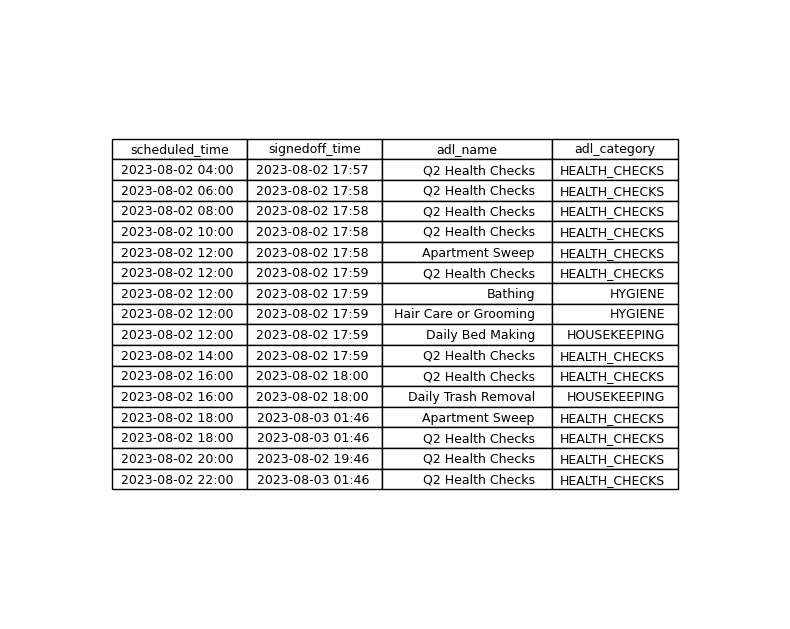

In [56]:
table_data = busy_day[["scheduled_time", "signedoff_time", "adl_name", "adl_category"]]

fig, ax = plt.subplots(figsize=(8, len(table_data)*0.4))
ax.axis("off")

table = ax.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    loc="center"
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width(col=list(range(len(table_data.columns))))

plt.tight_layout()
plt.show()

Maybe we can look at changes in assistance levels over time. If certain checks increase perhaps there is a signal there?
After review, there is no variability in each ADL. Fixed characteristic? 

In [57]:
adl_df["adl_level_of_assistance_name"].value_counts()
adl_df.groupby("adl_name")["adl_level_of_assistance_name"].value_counts()


adl_name               adl_level_of_assistance_name
Apartment Sweep        Total Assistance                20
Bathing                Moderate Assistance              3
Daily Bed Making       Minimal Assistance               7
Daily Trash Removal    Moderate Assistance              1
Eating                 Moderate Assistance              2
Hair Care or Grooming  Minimal Assistance               8
Incontinence Care      Total Assistance                10
Q2 Health Checks       Minimal Assistance              49
Name: count, dtype: int64

Does "execution_status" provide useful information? I am not seeing anything with the amount of data that we have.

In [58]:
adl_df["execution_status"].value_counts()
adl_df.groupby("adl_name")["execution_status"].value_counts()


adl_name               execution_status
Apartment Sweep        2                   10
                       3                   10
Bathing                3                    3
Daily Bed Making       3                    4
                       2                    3
Daily Trash Removal    3                    1
Eating                 2                    2
Hair Care or Grooming  3                    5
                       2                    3
Incontinence Care      2                    8
                       3                    2
Q2 Health Checks       3                   35
                       2                   14
Name: count, dtype: int64

In [59]:
adl_df["adl_exeception_reason"].value_counts()


adl_exeception_reason
ADL on Hold                  5
Refused                      4
Resident is not available    2
Name: count, dtype: int64

In [60]:
summary = (
    adl_df.groupby(["adl_name", "adl_level_of_assistance_name", "execution_status", "adl_exeception_reason"])
    .size()
    .reset_index(name="count")
)
print(summary.head(20))


                adl_name adl_level_of_assistance_name  execution_status      adl_exeception_reason  count
0        Apartment Sweep             Total Assistance                 2                ADL on Hold      3
1        Apartment Sweep             Total Assistance                 3  Resident is not available      1
2       Daily Bed Making           Minimal Assistance                 2                    Refused      1
3       Daily Bed Making           Minimal Assistance                 3  Resident is not available      1
4  Hair Care or Grooming           Minimal Assistance                 2                    Refused      2
5      Incontinence Care             Total Assistance                 2                ADL on Hold      2
6       Q2 Health Checks           Minimal Assistance                 2                    Refused      1


Any patterns to the spot-checks? Most are scheduled for the middle of the day, in the middle of the week? (not necessarily when they are signed off)

In [61]:
adl_df["date"] = adl_df["adl_scheduled_start_date"].dt.date
checks_per_day = adl_df.groupby("date").size()

print(checks_per_day)


date
2023-01-31     5
2023-02-14     1
2023-03-17     1
2023-03-21     2
2023-03-22     4
2023-03-23     1
2023-03-28     2
2023-04-03     1
2023-04-04     1
2023-04-12     1
2023-04-15     3
2023-04-19     2
2023-04-20     1
2023-04-25     3
2023-05-03     2
2023-05-08     1
2023-05-09     8
2023-05-10     5
2023-05-17     1
2023-05-19     3
2023-05-23     1
2023-06-22     1
2023-08-01     1
2023-08-02    16
2023-08-03    12
2023-08-09    10
2023-08-14    11
dtype: int64


In [62]:
adl_df["day_name"] = adl_df["adl_scheduled_start_date"].dt.day_name()
checks_by_day = adl_df["day_name"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

print(checks_by_day)


day_name
Monday       13.0
Tuesday      24.0
Wednesday    41.0
Thursday     15.0
Friday        4.0
Saturday      3.0
Sunday        NaN
Name: count, dtype: float64


In [63]:
adl_df["hour"] = adl_df["adl_scheduled_start_date"].dt.hour
checks_by_hour = adl_df["hour"].value_counts().sort_index()

print(checks_by_hour)


hour
0      2
2      3
4      4
6      5
8      9
10    16
11     1
12    31
13    10
14     4
16     3
18     6
19     3
20     1
21     1
22     1
Name: count, dtype: int64


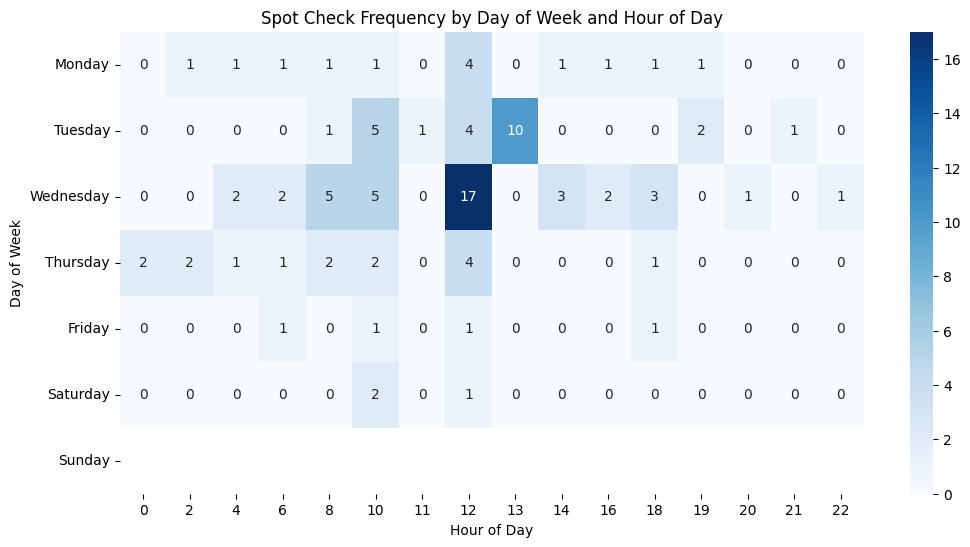

In [64]:

spot_check_heatmap = (
    adl_df.groupby([adl_df["day_name"], adl_df["hour"]])
          .size()
          .unstack(fill_value=0)
          .reindex(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
)

plt.figure(figsize=(12,6))
sns.heatmap(spot_check_heatmap, cmap="Blues", annot=True, fmt=".0f")
plt.title("Spot Check Frequency by Day of Week and Hour of Day")
plt.ylabel("Day of Week")
plt.xlabel("Hour of Day")
plt.show()


Each week there seems to be very few checks, mostly 1 (less). Instead of looking at days, let's look at what is happening per week.

In [65]:
adl_df["week"] = (
    adl_df["adl_scheduled_start_date"]
    .dt.tz_localize(None)   # remove timezone
    .dt.to_period("W")
    .apply(lambda r: r.start_time)
)

weekly_adls = (
    adl_df.groupby(["week", "adl_name"])
          .size()
          .unstack(fill_value=0)
)

print(weekly_adls)


adl_name    Apartment Sweep  Bathing  Daily Bed Making  Daily Trash Removal  Eating  Hair Care or Grooming  Incontinence Care  Q2 Health Checks
week                                                                                                                                           
2023-01-30                1        0                 1                    0       1                      1                  0                 1
2023-02-13                0        0                 0                    0       1                      0                  0                 0
2023-03-13                0        0                 0                    0       0                      0                  0                 1
2023-03-20                1        0                 1                    0       0                      0                  5                 0
2023-03-27                1        0                 0                    0       0                      0                  0           

In [66]:
weekly_exceptions = (
    adl_df.groupby(["week", "adl_exeception_reason"])
          .size()
          .unstack(fill_value=0)
)

print(weekly_exceptions)


adl_exeception_reason  ADL on Hold  Refused  Resident is not available
week                                                                  
2023-03-13                       0        1                          0
2023-04-10                       1        0                          0
2023-04-17                       2        0                          0
2023-05-15                       1        0                          0
2023-07-31                       1        3                          0
2023-08-07                       0        0                          2


In [67]:
weekly_activity = (
    adl_df.groupby(["week", "adl_name"])
          .size()
          .unstack(fill_value=0)
)

weekly_summary = weekly_adls.join(weekly_exceptions, how="left").fillna(0)
print(weekly_summary)


            Apartment Sweep  Bathing  Daily Bed Making  Daily Trash Removal  Eating  Hair Care or Grooming  Incontinence Care  Q2 Health Checks  ADL on Hold  Refused  Resident is not available
week                                                                                                                                                                                            
2023-01-30                1        0                 1                    0       1                      1                  0                 1          0.0      0.0                        0.0
2023-02-13                0        0                 0                    0       1                      0                  0                 0          0.0      0.0                        0.0
2023-03-13                0        0                 0                    0       0                      0                  0                 1          0.0      1.0                        0.0
2023-03-20                1        

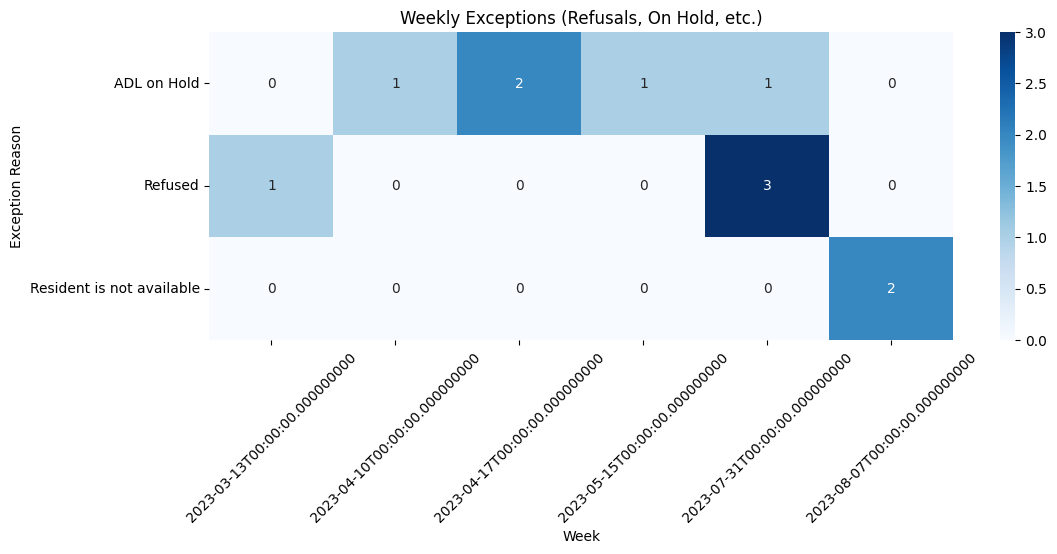

In [68]:
plt.figure(figsize=(12,4))
sns.heatmap(weekly_exceptions.T, cmap="Blues", annot=True, fmt="d")
plt.title("Weekly Exceptions (Refusals, On Hold, etc.)")
plt.xlabel("Week")
plt.ylabel("Exception Reason")
plt.xticks(rotation=45)
plt.show()

In [69]:
# find start and end week
week_min = adl_df["week"].min()
week_max = adl_df["week"].max()

# create a continuous weekly range
all_weeks = pd.date_range(start=week_min, end=week_max, freq="W-MON")

weekly_check_days = (
    adl_df.groupby("week")["date"].nunique()
    .reindex(all_weeks, fill_value=0)   # fill missing weeks with 0
)
# show just the date part (no time)
weekly_check_days.index = weekly_check_days.index.to_series().dt.date



print(weekly_check_days)

2023-01-30    1
2023-02-06    0
2023-02-13    1
2023-02-20    0
2023-02-27    0
2023-03-06    0
2023-03-13    1
2023-03-20    3
2023-03-27    1
2023-04-03    2
2023-04-10    2
2023-04-17    2
2023-04-24    1
2023-05-01    1
2023-05-08    3
2023-05-15    2
2023-05-22    1
2023-05-29    0
2023-06-05    0
2023-06-12    0
2023-06-19    1
2023-06-26    0
2023-07-03    0
2023-07-10    0
2023-07-17    0
2023-07-24    0
2023-07-31    3
2023-08-07    1
2023-08-14    1
Name: date, dtype: int64


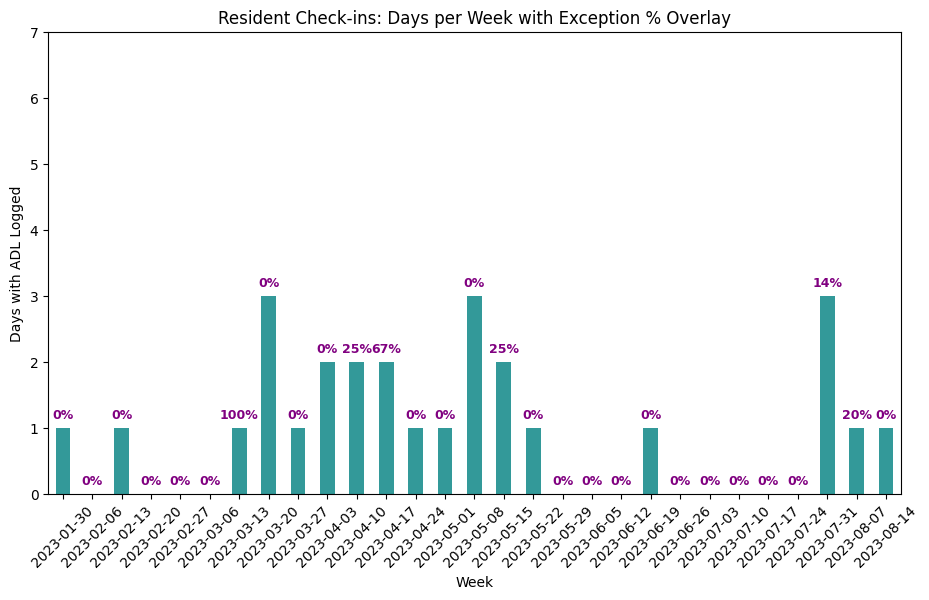

In [70]:
# flag exceptions
adl_df["has_exception"] = adl_df["adl_exeception_reason"].notna()

# compute weekly exception % (aligned with same all_weeks range)
weekly_exception_rate = (
    adl_df.groupby("week")["has_exception"].mean() * 100
).reindex(all_weeks, fill_value=0)

# align indexes for plotting
weekly_exception_rate.index = weekly_exception_rate.index.to_series().dt.date
weekly_exception_rate.index = pd.to_datetime(weekly_exception_rate.index).strftime("%Y-%m-%d")

plt.figure(figsize=(11,6))
ax = weekly_check_days.plot(kind="bar", color="teal", alpha=0.8)

plt.ylabel("Days with ADL Logged")
plt.xlabel("Week")
plt.title("Resident Check-ins: Days per Week with Exception % Overlay")
plt.ylim(0, 7)

# add red % labels above bars
for idx, (days, exc) in enumerate(zip(weekly_check_days, weekly_exception_rate)):
    ax.text(
        idx, days + 0.1, f"{exc:.0f}%", 
        ha="center", va="bottom", color="purple", fontsize=9, fontweight="bold"
    )

plt.xticks(rotation=45)
plt.show()


---

## Progress Notes

In [71]:
file = "dev_progress_notes.csv"

# full path
file_path = os.path.join(base_dir, file)
prog_notes_df = pd.read_csv(file_path)
profile_dataframe(prog_notes_df)

,dtype,non_null,% missing,unique,top,sample_values
column,,,,,,
community_uuid,object,12,0.00,1,operator-1-community-205,[operator-1-community-205]
id,int64,12,0.00,12,1,"[2276, 276, 2185, 899, 1335]"
reported_by,object,3,75.00,3,Joy,"[Test, Joy, Molly Snyder]"
created_date,object,12,0.00,12,2022-10-06T19:59:47.000Z,"[2024-07-23T20:37:58.000Z, 2023-02-02T18:52:17..."
created_by_id,int64,12,0.00,8,247,"[247, 554, 736, 232, 948]"
last_modified_date,object,12,0.00,12,2022-10-06T19:59:47.000Z,"[2024-07-23T20:37:58.000Z, 2023-02-02T18:52:17..."
last_modified_by_id,int64,12,0.00,8,247,"[247, 554, 736, 232, 948]"
progress_note_date,object,12,0.00,12,2022-10-06T19:58:48.000Z,"[2024-07-23T20:37:54.000Z, 2023-02-02T18:42:58..."
additional_notes,object,10,16.67,10,Donald has been enrolled in PT,"[add note, Resident is unaware of community su..."


In [72]:
prog_notes_df

,community_uuid,id,reported_by,created_date,created_by_id,last_modified_date,last_modified_by_id,progress_note_date,additional_notes,resident_id,incident_id
0,operator-1-community-205,2276,NaN,2024-07-23T20:37:58.000Z,247,2024-07-23T20:37:58.000Z,247,2024-07-23T20:37:54.000Z,add note,227,253.0
1,operator-1-community-205,276,NaN,2023-02-02T18:52:17.000Z,554,2023-02-02T18:52:17.000Z,554,2023-02-02T18:42:58.000Z,Resident is unaware of community surroundings ...,728,427.0
2,operator-1-community-205,2185,NaN,2024-06-13T17:58:15.000Z,736,2024-06-13T17:58:15.000Z,736,2024-06-13T17:58:08.000Z,Donald has been enrolled in PT,1445,NaN
3,operator-1-community-205,899,NaN,2023-08-01T07:51:41.000Z,232,2023-08-01T07:51:41.000Z,232,2023-08-01T07:51:02.000Z,test,1219,NaN
4,operator-1-community-205,1335,NaN,2023-12-05T15:26:38.000Z,948,2023-12-05T15:26:38.000Z,948,2023-12-05T15:26:13.000Z,Order requested for PT/OT/ST,211,NaN
5,operator-1-community-205,3188,NaN,2025-04-01T13:38:53.000Z,303,2025-04-01T13:38:53.000Z,303,2025-04-01T13:38:43.000Z,NaN,223,NaN
6,operator-1-community-205,140,Test,2022-12-21T03:47:58.000Z,294,2022-12-21T03:47:58.000Z,294,2022-12-20T03:47:26.000Z,Resident remains stable,211,1.0
7,operator-1-community-205,2442,NaN,2024-09-23T15:21:26.000Z,736,2024-09-23T15:49:26.000Z,736,2024-09-23T15:21:24.000Z,gait improving,1404,2564.0
8,operator-1-community-205,110,Joy,2022-12-13T00:03:49.000Z,293,2022-12-13T00:03:49.000Z,293,2022-12-13T00:02:49.000Z,NaN,227,253.0
9,operator-1-community-205,1,Molly Snyder,2022-10-06T19:59:47.000Z,303,2022-10-06T19:59:47.000Z,303,2022-10-06T19:58:48.000Z,wound is healing well,728,NaN


Here are the notes for the resident 211, the is features in the first file explored.

In [73]:
notes_211 = prog_notes_df[prog_notes_df["resident_id"] == 211].copy()

# Convert dates to datetime
date_cols = ["created_date", "last_modified_date", "progress_note_date"]
for col in date_cols:
    notes_211[col] = pd.to_datetime(notes_211[col])

# Sort by note date
notes_211 = notes_211.sort_values("progress_note_date")
print(notes_211)



             community_uuid    id reported_by              created_date  created_by_id        last_modified_date  last_modified_by_id        progress_note_date              additional_notes  resident_id  incident_id
6  operator-1-community-205   140        Test 2022-12-21 03:47:58+00:00            294 2022-12-21 03:47:58+00:00                  294 2022-12-20 03:47:26+00:00      Resident remains stable           211          1.0
4  operator-1-community-205  1335         NaN 2023-12-05 15:26:38+00:00            948 2023-12-05 15:26:38+00:00                  948 2023-12-05 15:26:13+00:00  Order requested for PT/OT/ST          211          NaN


---

## Temporary Warnings

In [74]:
file = "dev_temporary_warnings.csv"

# full path
file_path = os.path.join(base_dir, file)
temp_warn_df = pd.read_csv(file_path)
profile_dataframe(temp_warn_df)

,dtype,non_null,% missing,unique,top,sample_values
column,,,,,,
community_uuid,object,39,0.00,1,operator-1-community-205,[operator-1-community-205]
id,int64,39,0.00,39,15,"[369, 732, 89, 320, 266]"
custom_warning,object,7,82.05,7,Custom 1,"[Resident has covid, don't come into room, da,..."
antibiotic_warning,object,3,92.31,3,Antibiotic - Resistant infection,"[sad, Antibiotic - Resistant infection, Antibi..."
has_antibiotic_warning,object,2,94.87,1,False,[False]
created_date,object,39,0.00,39,2022-09-08T13:00:19.000Z,"[2023-07-06T14:47:34.000Z, 2024-05-06T23:16:07..."
last_modified_date,object,39,0.00,34,2023-01-31T18:42:41.000Z,"[2023-07-06T17:40:04.000Z, 2024-05-10T04:01:04..."
initial_key,int64,39,0.00,9,89,"[254, 203, 89, 294, 260]"
active,bool,39,0.00,2,False,"[False, True]"


In [75]:
temp_warn_df

,community_uuid,id,custom_warning,antibiotic_warning,has_antibiotic_warning,created_date,last_modified_date,initial_key,active,resident_id,created_by_id,last_modified_by_id,prior_key_id,required_documentation,start_date,end_date
0,operator-1-community-205,369,NaN,NaN,NaN,2023-07-06T14:47:34.000Z,2023-07-06T17:40:04.000Z,254,False,223,303,303,319.0,NaN,2023-07-03T04:00:00.000Z,2023-07-06T17:40:04.000Z
1,operator-1-community-205,732,NaN,NaN,NaN,2024-05-06T23:16:07.000Z,2024-05-10T04:01:04.000Z,203,False,211,1130,1130,645.0,Fall 5/6,2024-05-06T04:00:00.000Z,2024-05-09T04:00:00.000Z
2,operator-1-community-205,89,NaN,NaN,False,2022-10-06T17:45:03.000Z,2023-01-19T16:08:37.000Z,89,False,728,303,303,NaN,NaN,NaN,2023-01-19T16:08:37.000Z
3,operator-1-community-205,320,NaN,NaN,NaN,2023-05-03T14:25:35.000Z,2023-05-19T13:09:16.000Z,89,False,728,303,303,268.0,NaN,2023-05-01T04:00:00.000Z,2023-05-19T13:09:16.000Z
4,operator-1-community-205,266,NaN,NaN,NaN,2023-03-01T15:31:21.000Z,2023-05-03T14:24:48.000Z,254,False,223,554,303,254.0,NaN,2023-03-01T05:00:00.000Z,2023-04-30T04:00:00.000Z
5,operator-1-community-205,370,NaN,NaN,NaN,2023-07-06T17:40:04.000Z,2023-09-12T17:22:17.000Z,254,False,223,303,554,369.0,NaN,2023-07-03T04:00:00.000Z,2023-09-12T17:22:17.000Z
6,operator-1-community-205,1052,NaN,NaN,NaN,2025-04-09T14:04:26.000Z,2025-04-09T14:04:26.000Z,294,False,1148,1097,1097,1051.0,NaN,2025-04-01T04:00:00.000Z,2025-04-05T04:00:00.000Z
7,operator-1-community-205,244,NaN,NaN,NaN,2023-01-19T16:08:37.000Z,2023-01-19T16:09:20.000Z,89,False,728,303,303,89.0,NaN,2022-10-06T04:00:00.000Z,2023-01-18T05:00:00.000Z
8,operator-1-community-205,1051,NaN,NaN,NaN,2025-04-09T14:04:05.000Z,2025-04-09T14:04:26.000Z,294,False,1148,1097,1097,357.0,NaN,2025-04-01T04:00:00.000Z,2025-04-09T14:04:26.000Z
9,operator-1-community-205,526,NaN,NaN,NaN,2023-11-09T18:23:13.000Z,2024-03-26T16:31:51.000Z,89,False,728,554,554,341.0,NaN,2023-11-01T04:00:00.000Z,2024-03-26T16:31:51.000Z


In [76]:
temp_warn_211 = temp_warn_df[temp_warn_df["resident_id"] == 211].copy()

# Convert dates to datetime
date_cols = ["created_date", "last_modified_date", "start_date", "end_date"]
for col in date_cols:
    temp_warn_211[col] = pd.to_datetime(temp_warn_211[col])

# Sort by note date
temp_warn_211 = temp_warn_211.sort_values("start_date")
print(temp_warn_211)

              community_uuid   id                            custom_warning antibiotic_warning has_antibiotic_warning              created_date        last_modified_date  initial_key  active  resident_id  created_by_id  last_modified_by_id  prior_key_id required_documentation                start_date                  end_date
30  operator-1-community-205  204                                       NaN                NaN                    NaN 2022-11-30 21:06:33+00:00 2023-01-18 18:33:17+00:00          203   False          211            294                  303         203.0                   Test 2022-11-01 04:00:00+00:00 2022-11-30 21:06:33+00:00
31  operator-1-community-205  203                                       NaN                NaN                    NaN 2022-11-30 16:14:28+00:00 2022-11-30 21:06:33+00:00          203   False          211            294                  294           NaN                   Test 2022-11-30 05:00:00+00:00 2022-11-30 21:06:33+00:00
18  operator-

---

## Shift Change Notes

In [77]:
file = "dev_shift_change_notes.csv"

# full path
file_path = os.path.join(base_dir, file)
shift_change_df = pd.read_csv(file_path)
profile_dataframe(shift_change_df)

,dtype,non_null,% missing,unique,top,sample_values
column,,,,,,
community_uuid,object,79,0.00,1,operator-1-community-205,[operator-1-community-205]
id,int64,79,0.00,79,15,"[2815, 9285, 50629, 139371, 8308]"
note,object,79,0.00,67,test,[Darren is showing poor signs of safety awaren...
note_date,object,79,0.00,79,2022-09-08T12:42:36.000Z,"[2023-01-31T18:43:29.000Z, 2023-05-08T18:06:00..."
created_date,object,79,0.00,79,2022-09-08T12:42:42.000Z,"[2023-01-31T18:45:00.000Z, 2023-05-08T18:09:46..."
created_by,object,79,0.00,16,Ayush Agarwal,"[molly.arp@gmail.com, Molly Snyder, Elissa Gil..."
last_modified_date,object,79,0.00,79,2022-09-08T12:42:42.000Z,"[2023-01-31T18:45:00.000Z, 2023-05-08T18:09:46..."
last_modified_by,object,55,30.38,13,Molly Training,"[molly.arp@gmail.com, Molly Snyder, Bennett P..."
staff_signed_off,bool,79,0.00,1,True,[True]


In [78]:
shift_change_df.head()

,community_uuid,id,note,note_date,created_date,created_by,last_modified_date,last_modified_by,staff_signed_off,staff_signed_off_by_id,resident_id,building_id,zone_id
0,operator-1-community-205,2815,Darren is showing poor signs of safety awarene...,2023-01-31T18:43:29.000Z,2023-01-31T18:45:00.000Z,molly.arp@gmail.com,2023-01-31T18:45:00.000Z,molly.arp@gmail.com,True,554,226.0,NaN,NaN
1,operator-1-community-205,9285,test,2023-05-08T18:06:00.000Z,2023-05-08T18:09:46.000Z,Molly Snyder,2023-05-08T18:09:46.000Z,NaN,True,303,215.0,NaN,NaN
2,operator-1-community-205,50629,Veronica did not want to participate in her no...,2024-03-18T23:00:07.000Z,2024-03-05T18:25:20.000Z,Elissa Gillian,2024-03-19T16:40:54.000Z,Molly Snyder,True,303,221.0,NaN,NaN
3,operator-1-community-205,139371,"Caregiver A: Resident's fall monitor alerted, ...",2025-07-23T14:22:51.000Z,2025-07-23T14:25:10.000Z,Bennett Porson,2025-07-23T14:25:10.000Z,Bennett Porson,True,736,1404.0,NaN,NaN
4,operator-1-community-205,8308,test,2023-04-25T18:43:00.000Z,2023-04-25T18:44:36.000Z,Molly Snyder,2023-04-25T18:44:36.000Z,NaN,True,303,211.0,NaN,NaN


In [79]:
shift_change_211 = shift_change_df[shift_change_df["resident_id"] == 211].copy()

# Convert date fields
for col in ["note_date", "created_date", "last_modified_date"]:
    shift_change_211[col] = pd.to_datetime(shift_change_211[col], errors="coerce")

# Sort by note_date
shift_change_211 = shift_change_211.sort_values("note_date")


In [80]:
shift_change_211

,community_uuid,id,note,note_date,created_date,created_by,last_modified_date,last_modified_by,staff_signed_off,staff_signed_off_by_id,resident_id,building_id,zone_id
71,operator-1-community-205,6751,tesy457 #@#<%>%>:,2023-04-03 13:32:00+00:00,2023-04-03 08:02:35+00:00,Ayush Agarwal,2023-04-03 08:02:35+00:00,NaN,True,602,211.0,NaN,NaN
26,operator-1-community-205,7401,gigi,2023-04-12 16:58:00+00:00,2023-04-12 11:29:43+00:00,Ayush Agarwal,2023-04-12 11:29:43+00:00,NaN,True,602,211.0,NaN,NaN
4,operator-1-community-205,8308,test,2023-04-25 18:43:00+00:00,2023-04-25 18:44:36+00:00,Molly Snyder,2023-04-25 18:44:36+00:00,NaN,True,303,211.0,NaN,NaN
22,operator-1-community-205,8904,test,2023-05-03 17:52:00+00:00,2023-05-03 17:51:20+00:00,Molly Snyder,2023-05-03 17:51:20+00:00,NaN,True,303,211.0,NaN,NaN
67,operator-1-community-205,10160,test,2023-05-19 13:44:57+00:00,2023-05-19 13:45:01+00:00,Rachel Martinez,2023-05-19 13:45:01+00:00,NaN,True,232,211.0,NaN,NaN
10,operator-1-community-205,10207,test,2023-05-20 01:53:42+00:00,2023-05-20 01:53:46+00:00,Rachel Martinez,2023-05-20 01:53:46+00:00,NaN,True,232,211.0,NaN,NaN
42,operator-1-community-205,36214,test JK,2023-12-05 15:19:06+00:00,2023-12-05 15:19:13+00:00,Jennifer Keeney,2023-12-05 15:19:13+00:00,NaN,True,948,211.0,NaN,NaN
24,operator-1-community-205,45815,k,2024-01-31 22:35:27+00:00,2024-01-31 22:35:34+00:00,Fynn Care,2024-01-31 22:35:34+00:00,NaN,True,662,211.0,NaN,NaN
